In [93]:
# Import necessary library

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import pylab as pl

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import map data
import folium # map rendering library

# import beautiful soup
from bs4 import BeautifulSoup as bsoup

# Extracting Data from Website

In [4]:
# Extract neighborhood data using beautiful soup

# Downloading the page using requests
page = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

#Parsing a page with BeautifulSoup
soup = bsoup(page.content, "html.parser")

# Extract table data
table = soup.find("table")
output_rows = []
for table_row in table.findAll('tr'):
    columns = table_row.findAll('td')
    output_row = []
    for column in columns:
        text = column.text
        text = text.replace('\n','')
        output_row.append(text)
    output_rows.append(output_row)
        
# Put the data in dataframe
import pandas as pd
df=pd.DataFrame(output_rows,columns=['Postcode','Borough', 'Neighborhood'])
df.drop(df.index[0], inplace = True)
df.head()

,Postcode,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront


# Data Cleaning

In [5]:
# Data Cleaning

# drop rows with 'Not assigned' Borough
df = df[df.Borough != 'Not assigned']
df.reset_index(drop = True, inplace = True)

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough
df.Neighborhood = df.Neighborhood.replace('Not assigned', df.Borough)

# Group neighborhoods with the same postcode
df_group = df.groupby(['Postcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df_group.head()

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [11]:
# Add Geospatial Data
#read geospatial data 
geofile = pd.read_csv('Geospatial_Coordinates.csv')
geofile.rename(columns = {'Postal Code':'Postcode'}, inplace = True)
geofile.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
# # Merge the two datafile based on Postcode
df_merge = pd.merge(df_group, geofile, on='Postcode')
df_merge.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [13]:
# Filter data to only neighborhood in Toronto (only keep neighborhood in Borough with the word Toronto in them)
toronto_data = df_merge[df_merge['Borough'].str.contains('Toronto')].reset_index(drop =True)
toronto_data

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


# Generate a map

# Explore University of Toronto Neighborhood

In [14]:
# @hidden_cell
#Defind four square credential
CLIENT_ID = 'SWZWHJZMZQFSE2F31FA5DFX5DFU1EOQVMRETHLVDDSCUROGL' # your Foursquare ID
CLIENT_SECRET = 'T44B5V42JJPSEXCR42KQQ4O1HOP3DFWFIXA43USOKJBQYGUE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [15]:
# Explore Neighborhood near University of Toronto (M5S)

# Get latitude and longitude data
neighborhood_latitude = toronto_data.loc[25, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[25, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[25, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Harbord, University of Toronto are 43.6626956, -79.4000493.


In [33]:
# Get the top 100 venues near University of Toronto within a radius of 500 meters

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

In [34]:
# write a function to get category name of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [35]:
# clean json file into structure dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Yasu,Japanese Restaurant,43.662837,-79.403217
1,Rasa,Restaurant,43.662757,-79.403988
2,Piano Piano,Italian Restaurant,43.662949,-79.402898
3,The Dessert Kitchen,Dessert Shop,43.662823,-79.402746
4,Almond Butterfly,Bakery,43.662836,-79.403365


In [36]:
# Find out how many venues were returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

# Findd out how many unique categories were returned by FOursquare
print('{} of unique categories were returned.'.format(len(nearby_venues['categories'].unique())))


34 venues were returned by Foursquare.
25 of unique categories were returned.


In [37]:
# generate a map of University of Toronto Neighborhood with the top 100 venues

university_toronto_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=11)

# add marker
for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(university_toronto_map) 
    
university_toronto_map

# Analyse Each Neighborhood

In [38]:
# Write a function to extract nearby venues in each neighborhood with a radius of 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )
toronto_venues.head()

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


In [42]:
# Find out how many venues were returned by Foursquare
print('{} venues were returned by Foursquare.'.format(toronto_venues.shape[0]))

# Findd out how many unique categories were returned by FOursquare
print('{} of unique categories were returned.'.format(len(toronto_venues['Venue Category'].unique())))


1700 venues were returned by Foursquare.
239 of unique categories were returned.


In [49]:
# Find 5 most common venues in each neighborhood

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]


In [53]:
# Count the frequency of each venue type in each neighborhood
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

toronto_grouped.head()

,Neighborhood,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.01,0.0,0.0
1,Berczy Park,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.018182,0.0,0.0,0.0,0.00,0.0,0.0
2,"Brockton, Exhibition Place, Parkdale Village",0.045455,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
3,Business Reply Mail Processing Centre 969 Eastern,0.052632,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.0,0.0,0.0625,0.0625,0.0625,0.125,0.125,0.125,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0


In [54]:
# Find the top 10 most common venue type in each neighborhood
num_top_venues = 10

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0          Coffee Shop  0.06
1                 Café  0.05
2           Steakhouse  0.04
3                  Bar  0.04
4  American Restaurant  0.04
5      Thai Restaurant  0.04
6           Restaurant  0.03
7         Burger Joint  0.03
8                  Gym  0.03
9       Cosmetics Shop  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2  Italian Restaurant  0.04
3                Café  0.04
4            Beer Bar  0.04
5         Cheese Shop  0.04
6  Seafood Restaurant  0.04
7              Bakery  0.04
8      Farmers Market  0.04
9          Steakhouse  0.04


----Brockton, Exhibition Place, Parkdale Village----
                  venue  freq
0        Breakfast Spot  0.09
1                  Café  0.09
2           Coffee Shop  0.09
3           Yoga Studio  0.05
4                Bakery  0.05
5               Stadium  0.05
6         Burrito Place  0.05
7  Caribbean Restaurant

                             venue  freq
0                             Park  0.33
1                      Swim School  0.33
2                         Bus Line  0.33
3                      Yoga Studio  0.00
4          New American Restaurant  0.00
5               Mexican Restaurant  0.00
6        Middle Eastern Restaurant  0.00
7               Miscellaneous Shop  0.00
8       Modern European Restaurant  0.00
9  Molecular Gastronomy Restaurant  0.00


----Little Portugal, Trinity----
                     venue  freq
0                      Bar  0.13
1         Asian Restaurant  0.05
2              Men's Store  0.05
3              Coffee Shop  0.05
4  New American Restaurant  0.03
5               Restaurant  0.03
6              Pizza Place  0.03
7                   Bakery  0.03
8    Vietnamese Restaurant  0.03
9             Cocktail Bar  0.03


----Moore Park, Summerhill East----
                             venue  freq
0                       Playground   0.5
1                     Tennis Co

In [109]:
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Bar,American Restaurant,Steakhouse,Hotel,Restaurant,Cosmetics Shop,Gym
1,Berczy Park,Coffee Shop,Cocktail Bar,Italian Restaurant,Farmers Market,Café,Cheese Shop,Seafood Restaurant,Beer Bar,Steakhouse,Bakery
2,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Café,Breakfast Spot,Yoga Studio,Italian Restaurant,Pet Store,Climbing Gym,Caribbean Restaurant,Restaurant,Burrito Place
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Pizza Place,Gym / Fitness Center,Recording Studio,Restaurant,Butcher,Burrito Place,Brewery,Skate Park
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Terminal,Airport Lounge,Plane,Coffee Shop,Boat or Ferry,Sculpture Garden,Boutique,Bar,Airport Gate


# Cluster Neighborhood

In [100]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood',1)

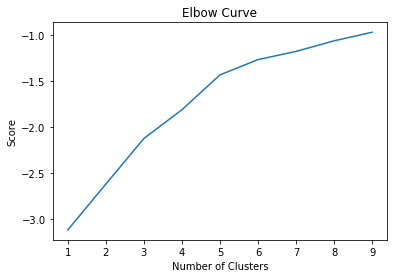

In [101]:
# Find the optimal K

Nc = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(toronto_grouped_clustering).score(toronto_grouped_clustering) for i in range(len(kmeans))]

score

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

From the graph, we see that the optimal number of cluster is 5. 

In [111]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       3, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [112]:

# add clustering labels
neighborhoods_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)

toronto_merged =toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged =toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Other Great Outdoors,Pub,Trail,Falafel Restaurant,Event Space,Farmers Market,Ethiopian Restaurant,Diner,Fast Food Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Yoga Studio,Bookstore,Brewery,Bubble Tea Shop,Café
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,0,Park,Pizza Place,Sushi Restaurant,Ice Cream Shop,Italian Restaurant,Fish & Chips Shop,Fast Food Restaurant,Liquor Store,Movie Theater,Pet Store
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Gastropub,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Gym,Brewery,Seafood Restaurant
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Park,Swim School,Bus Line,Women's Store,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [113]:
# Examine Cluster

# cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,0,Health Food Store,Other Great Outdoors,Pub,Trail,Falafel Restaurant,Event Space,Farmers Market,Ethiopian Restaurant,Diner,Fast Food Restaurant
1,East Toronto,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Yoga Studio,Bookstore,Brewery,Bubble Tea Shop,Café
2,East Toronto,0,Park,Pizza Place,Sushi Restaurant,Ice Cream Shop,Italian Restaurant,Fish & Chips Shop,Fast Food Restaurant,Liquor Store,Movie Theater,Pet Store
3,East Toronto,0,Café,Coffee Shop,Gastropub,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Gym,Brewery,Seafood Restaurant
5,Central Toronto,0,Sandwich Place,Food & Drink Shop,Gym,Grocery Store,Breakfast Spot,Hotel,Park,Clothing Store,Dog Run,Doner Restaurant
6,Central Toronto,0,Coffee Shop,Yoga Studio,Bagel Shop,Fast Food Restaurant,Mexican Restaurant,Diner,Dessert Shop,Park,Clothing Store,Chinese Restaurant
7,Central Toronto,0,Pizza Place,Sandwich Place,Dessert Shop,Thai Restaurant,Coffee Shop,Restaurant,Café,Sushi Restaurant,Italian Restaurant,Farmers Market
9,Central Toronto,0,Coffee Shop,Pub,Light Rail Station,Supermarket,Fried Chicken Joint,Sports Bar,Sushi Restaurant,American Restaurant,Pizza Place,Vietnamese Restaurant
11,Downtown Toronto,0,Coffee Shop,Restaurant,Park,Café,Italian Restaurant,Bakery,Pub,Pizza Place,Breakfast Spot,Sandwich Place
12,Downtown Toronto,0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Men's Store,Pub,Burger Joint,Hotel,Café


In [114]:
# cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Central Toronto,1,Playground,Tennis Court,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


In [115]:
# cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,2,Ice Cream Shop,Garden,Women's Store,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


In [117]:
# cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,3,Park,Swim School,Bus Line,Women's Store,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [118]:
# cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Downtown Toronto,4,Park,Playground,Trail,Building,Diner,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
23,Central Toronto,4,Trail,Jewelry Store,Park,Sushi Restaurant,Electronics Store,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Women's Store


From the cluster examinations, we notice that: 
Cluster 1 is a collection of hip neighborhoods to hang out with friends as there are a lot of coffee shops, restaurants and pubs. 
Cluster 2 is neighborhoods for families with young children as there are playgrounds, sport amenitities, farmers markets around. 
Cluster 3 is neighborhoods for families who prefer to have the convenience of having eateries, discount stores, family stores, electronincs store around. 
Cluster 4 is neighborhoods for individuals who prefer nature and outdoor activities. 
Cluster 5 is neighborhoods good for outdoor activities as well as family friendly. 

In [123]:
# map the neighborhood cluster
# create map
map_clusters = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters